In [9]:
# import required packages 
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
Create table if not exists sales (id integer primary key,
                                    product Text,
                                    quantity integer,
                                    price real)
""" )



In [33]:
sample_data=[("Laptop",5,50000),
                ("Mobile",10,15000),
                ("Headphones",20,2000),
                ("Laptop",3,52000),
                ("Mobile",8,15500)]
cursor.executemany("INSERT INTO sales (product,quantity,price) VALUES (?,?,?)",sample_data)
conn.commit()
conn.close()

In [66]:
import pandas as pd 
conn=sqlite3.connect("sales_data.db")

query =""" select * from sales"""
data=pd.read_sql_query(query,conn)
data

,id,product,quantity,price
0,1,Laptop,5,50000.0
1,2,Mobile,10,15000.0
2,3,Laptop,5,50000.0
3,4,Mobile,10,15000.0
4,5,Laptop,5,50000.0
5,6,Mobile,10,15000.0
6,7,Laptop,5,50000.0
7,8,Mobile,10,15000.0
8,9,Laptop,5,50000.0
9,10,Mobile,10,15000.0


In [74]:
# read the table 


In [42]:
import pandas as pd 

conn=sqlite3.connect("sales_data.db")
query ="""
    Select product,
    sum(quantity) as total_quantity,
    sum(quantity * price) as revenue
from sales
group by product
"""
df=pd.read_sql_query(query,conn)
print(df)
conn.close()

      product  total_quantity    revenue
0  Headphones              40    80000.0
1      Laptop              36  1812000.0
2      Mobile              76  1148000.0


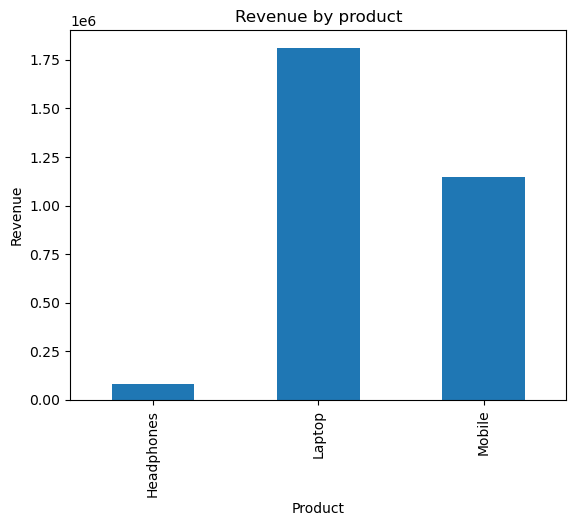

In [56]:
import matplotlib.pyplot as plt 

df.plot(kind='bar',x='product',y='revenue',legend =False)
plt.title("Revenue by product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.savefig("Sales_chart.png")
plt.show()

In [76]:
# i want only headphones reveune 
q1="""select product ,sum(price) as total_price from sales where product='Headphones'"""

pd.read_sql_query(q1,conn)

,product,total_price
0,Headphones,4000.0


In [78]:
# where product name start with m and middle p 
q2 = """ select * from sales where product like 'm%' """
pd.read_sql_query(q2,conn)

,id,product,quantity,price
0,2,Mobile,10,15000.0
1,4,Mobile,10,15000.0
2,6,Mobile,10,15000.0
3,8,Mobile,10,15000.0
4,10,Mobile,10,15000.0
5,13,Mobile,8,15500.0
6,15,Mobile,10,15000.0
7,18,Mobile,8,15500.0


In [82]:
# where product name start  middle 'p' 
q2 = """ select * from sales where product like '%p%' """
pd.read_sql_query(q2,conn).head()

,id,product,quantity,price
0,1,Laptop,5,50000.0
1,3,Laptop,5,50000.0
2,5,Laptop,5,50000.0
3,7,Laptop,5,50000.0
4,9,Laptop,5,50000.0
